<a href="https://colab.research.google.com/github/IkeLyons/HW2_DecisionTrees/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

The first step is to import the same data used in homework 1 (note they are commented out so that when I run all they dont run every time, if you are running for the first time you may need to uncomment all these first lines)

In [4]:
! pip install kaggle

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download tejashvi14/engineering-placements-prediction

  0% 0.00/10.0k [00:00<?, ?B/s]
100% 10.0k/10.0k [00:00<00:00, 20.9MB/s]


In [8]:
! unzip engineering-placements-prediction.zip

Archive:  engineering-placements-prediction.zip
  inflating: collegePlace.csv        


In [9]:
import pandas as pd
dataset = pd.read_csv('collegePlace.csv', encoding='utf-8')

Now do the same preprocessing that we did in homework 1

In [10]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
dataset.Stream = encoder.fit_transform(dataset.Stream)
dataset.Gender = encoder.fit_transform(dataset.Gender)
# see if the label encoding worked
dataset.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [11]:
X = dataset.drop('PlacedOrNot', 1)
y = dataset['PlacedOrNot']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Now we will begin making and testing the different decision trees. First, lets start by using the gini criterion, with default parameters.

In [13]:
from sklearn.tree import DecisionTreeClassifier
giniModel = DecisionTreeClassifier(criterion="gini")   
giniModel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
predict = giniModel.predict(X_test)
accuracy_score(y_test, predict)

0.8800539083557951

In [15]:
from sklearn.tree import export_text
feature_names = list(X.columns)
r = export_text(giniModel, feature_names=feature_names)
print(r)

|--- CGPA <= 7.50
|   |--- Internships <= 1.50
|   |   |--- Age <= 23.50
|   |   |   |--- Stream <= 4.50
|   |   |   |   |--- Stream <= 0.50
|   |   |   |   |   |--- HistoryOfBacklogs <= 0.50
|   |   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |   |   |--- CGPA <= 6.50
|   |   |   |   |   |   |   |   |   |--- Internships <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Hostel <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Hostel >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Internships >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Age >  20.50
|   |   |   

Now lets do the same thing, only changing the criteria to use the information gain criteria

In [16]:
entropyModel = DecisionTreeClassifier(criterion="entropy")   
entropyModel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
predict = entropyModel.predict(X_test)
accuracy_score(y_test, predict)

0.8787061994609164

In [18]:
r = export_text(entropyModel, feature_names=feature_names)
print(r)

|--- CGPA <= 7.50
|   |--- Internships <= 1.50
|   |   |--- Age <= 23.50
|   |   |   |--- Stream <= 4.50
|   |   |   |   |--- Stream <= 0.50
|   |   |   |   |   |--- HistoryOfBacklogs <= 0.50
|   |   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |   |--- CGPA <= 5.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- CGPA >  5.50
|   |   |   |   |   |   |   |   |--- Age <= 22.50
|   |   |   |   |   |   |   |   |   |--- CGPA <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- Internships <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Internships >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- CGPA >  6.50
|   |   |   |   |   |   |   |   |   |   |--- Internships <= 0.50
|   |   |   |   |   |   |   |   |

Lastly, lets try changing the max depth and minimum sample split for each respective criterion.

In [19]:
giniModelModified = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=5)   
giniModelModified.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
predict = giniModelModified.predict(X_test)
accuracy_score(y_test, predict)

0.8692722371967655

In [21]:
r = export_text(giniModelModified, feature_names=feature_names)
print(r)

|--- CGPA <= 7.50
|   |--- Internships <= 1.50
|   |   |--- Age <= 23.50
|   |   |   |--- Stream <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Stream >  4.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  23.50
|   |   |   |--- CGPA <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- CGPA >  6.50
|   |   |   |   |--- class: 0
|   |--- Internships >  1.50
|   |   |--- HistoryOfBacklogs <= 0.50
|   |   |   |--- CGPA <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- CGPA >  6.50
|   |   |   |   |--- class: 1
|   |   |--- HistoryOfBacklogs >  0.50
|   |   |   |--- Age <= 23.00
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  23.00
|   |   |   |   |--- class: 1
|--- CGPA >  7.50
|   |--- class: 1



In [22]:
entropyModelModified = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_split=5)   
entropyModelModified.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
predict = entropyModelModified.predict(X_test)
accuracy_score(y_test, predict)

0.8692722371967655

In [24]:
r = export_text(entropyModelModified, feature_names=feature_names)
print(r)

|--- CGPA <= 7.50
|   |--- Internships <= 1.50
|   |   |--- Age <= 23.50
|   |   |   |--- Stream <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Stream >  4.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  23.50
|   |   |   |--- CGPA <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- CGPA >  6.50
|   |   |   |   |--- class: 0
|   |--- Internships >  1.50
|   |   |--- HistoryOfBacklogs <= 0.50
|   |   |   |--- CGPA <= 6.50
|   |   |   |   |--- class: 1
|   |   |   |--- CGPA >  6.50
|   |   |   |   |--- class: 1
|   |   |--- HistoryOfBacklogs >  0.50
|   |   |   |--- Age <= 23.00
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  23.00
|   |   |   |   |--- class: 1
|--- CGPA >  7.50
|   |--- class: 1



What the above results show us is that the decision trees seem to be extremly prone to overfitting when we dont properly restrict the maximum depth. It was clear that reducing the maximum depth better generalized the results and caused the accuracy to increase. All of the other factors made no difference when compared to this. I think these results also tell us something about the data that I selected for this. Because there aren't many data points and because in these examples some factors are way more important than others (compare the importance of GPA to age for admissions) the decision tree doesnt actually need to be super deep. This is because GPA is inherently far more important than the age or gender of an applicant. This obviously makes restricting the depth of the decision tree advatageous. When comparing the structures of the two descision tree algorithms we see that the base of the tree is very similar and the differences only start to appear as we progress further into the tree strucutre. The accuracy of the two models isn't extremely different, but we see that the gini classifier performed slightly better in terms of accuracy.

# Task 2

Now time to create both the bagging and boosting algorithms, then testing their accuracy using the k-fold cross validation method. Starting with the bagging model as shown below:

In [52]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

baggingModel = BaggingClassifier(n_estimators=25)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(baggingModel, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("The accuracy is: %.3f with a standard deviation of: %.3f" % (np.mean(n_scores), np.std(n_scores)))
baggingModel.fit(X_train, y_train)

The accuracy is: 0.872 with a standard deviation of: 0.022


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=25,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

Next up is the boosting method, and more specifically we are going to use the AdaBoost algorithm.

In [53]:
from sklearn.ensemble import AdaBoostClassifier
adaClassifier = AdaBoostClassifier(n_estimators=5, random_state=42, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=43)
n_scores = cross_val_score(baggingModel, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print("The accuracy is: %.3f with a standard deviation of: %.3f" % (np.mean(n_scores), np.std(n_scores)))
adaClassifier.fit(X_train, y_train)

The accuracy is: 0.871 with a standard deviation of: 0.022


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

Overall, the two different methods seem very similar to each other, and garner pretty similar results. The main difference is that the AdaBoost model, while having lower accuracy, also had a lower standard deviation when compared to the bagging model. This might indicate that even though its accuracy is slightly worse, it might be a more generalized model, and therefore may perform better when given real world examples. This also all might come down to the the inherent randomness, but these results seem to be consistent across runs of the model.

# Task 3

Lastly, we are going to compare the accuracy of all three of the above model's to one another. 

First off, in order to determine what model was the most effective we need to discuss the metric that we are going to use in order to determine this. The metric that immediately makes the most sense in order to compare the diferent models is their accuracy. This makes sense because above all else the model's job is to make predictions, and if those predicitions aren't accurate they are useless. To this end the most accurate model that we have above is the bagging model, as it slightly edges out the boosting model by 0.004% accuracy. Of course the accuracy of the model isn't the only metric that can be used in order to compare the models. A different metric that we can look at is the confusion matrix of a model's predictions. This will allow us to gain more insight to the results as we will be able to see false positive/negatives whereas before we would only see if a single thing was wrong. If we were to use this metric we may get different results. Lets find out below if the confusion matrix changes what we might find as the most effective model.

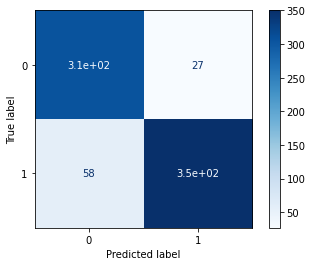

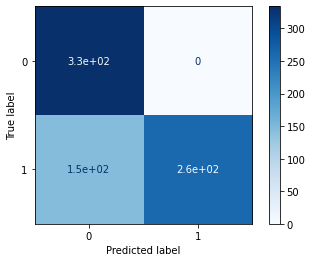

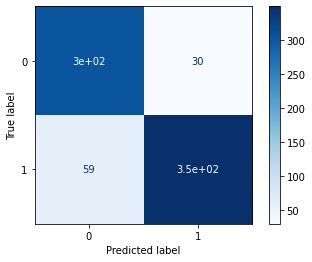

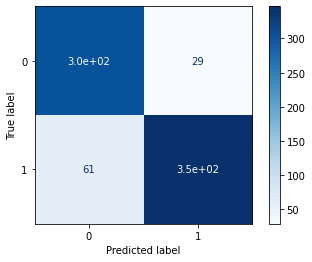

In [66]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Bagging model
disp = plot_confusion_matrix(baggingModel, X_test, y_test,
                            cmap=plt.cm.Blues)

# Adaboost Classifier
disp = plot_confusion_matrix(adaClassifier, X_test, y_test,
                            cmap=plt.cm.Blues)

# Gini Classifier model
disp = plot_confusion_matrix(giniModel, X_test, y_test,
                            cmap=plt.cm.Blues)

# Entropy model
disp = plot_confusion_matrix(entropyModel, X_test, y_test,
                            cmap=plt.cm.Blues)

As we can see, 3 of the 4 confusion matricies are very similar to each other with no substantial differences. The odd one out was the adaboost model, which never incorrectly identified a student who would make it into the engineering program, but frequently had false positives and would admit students that shouldnt be admitted. Regardless though, using the different metric didnt make a difference as adaboost was the only model with a significantly different result, and we didn't say it was the most effective before. Thus, the differnet metric didnt make a difference in this specific instance. If we were to select a different metric there is a chance that the results would change. 